# Coding Assigment
## Question 1
First of all let us import all libraries:

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import functions as f            #our functions.py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn import svm


%matplotlib inline
%load_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder that should be the extracted zip folder 
dataset = pd.read_csv(file)  # load the data and drop the first row that was filled with nans

random.seed(10) #our random seed
dataset.head(10) #visualise file

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0
5,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
6,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative,1
7,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive,0
8,37,Male,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,Positive,1
9,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive,1


Here we wanted to know some info about our data:

In [2]:
dataset = dataset.interpolate()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-null    object
 16  Diagnosi

Here we wanted to calculate what is a percentage of NaN values in a dataset:

In [3]:
df = dataset.copy()
df = df.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
isna = np.zeros(len(df.keys()))
percent_nan = np.zeros(len(df.keys()))
for i,feat in enumerate(df.keys()):
    isna[i] = df[feat].isna().sum()
    percent_nan[i] = 100*(isna[i]/len(df[feat]))
    print('NAN pecent in feature {}  =  {:.02f}%'.format(feat,percent_nan[i]))

NAN pecent in feature Age  =  0.00%
NAN pecent in feature Gender  =  0.00%
NAN pecent in feature Increased Urination  =  0.00%
NAN pecent in feature Increased Thirst  =  3.54%
NAN pecent in feature Sudden Weight Loss  =  1.59%
NAN pecent in feature Weakness  =  0.00%
NAN pecent in feature Increased Hunger  =  2.30%
NAN pecent in feature Genital Thrush  =  2.48%
NAN pecent in feature Visual Blurring  =  0.00%
NAN pecent in feature Itching  =  1.95%
NAN pecent in feature Irritability  =  0.00%
NAN pecent in feature Delayed Healing  =  0.00%
NAN pecent in feature Partial Paresis  =  0.00%
NAN pecent in feature Muscle Stiffness  =  2.65%
NAN pecent in feature Hair Loss  =  0.00%
NAN pecent in feature Obesity  =  0.00%
NAN pecent in feature Diagnosis  =  0.00%
NAN pecent in feature Family History  =  0.00%


So we can see that the NaN values take less than 4% of the data in each feature, so we can drop the NaN's and it will have little effect on a future analysis.
In addition, we wanted to make dataset become binary, to easier analysis and visualisation.

In [4]:
def make_data_binary(data):
    binary = data.copy()
    ''' 
    We have changed the values from string to the binary ones, it will be easier for us 
    to work with the data.
    Female = 0, Male = 1.
    Yes = 1, No = 0
    Positive = 1, Negative = 0
    '''
    binary = binary.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
    return binary.dropna() #we see in the data we have nan values. We have dropped them.

data = make_data_binary(dataset)
diag_state = data[["Diagnosis"]]
data.head(10) #visualize data after binarization

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0.0,0.0,1,0.0,0.0,0,1.0,0,0,1,0.0,1,0,0,0
1,42,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,0,0,0
2,45,1,1,1.0,0.0,1,0.0,1.0,0,0.0,0,1,0,0.0,1,0,1,0
3,59,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,1,1
4,40,0,1,1.0,1.0,1,0.0,0.0,1,1.0,0,0,1,1.0,0,0,1,0
5,72,1,1,0.0,0.0,0,1.0,0.0,1,1.0,0,1,1,1.0,1,0,0,0
6,43,1,0,0.0,0.0,1,0.0,1.0,0,1.0,0,1,0,0.0,1,0,0,1
7,57,1,1,1.0,1.0,1,1.0,0.0,1,0.0,0,0,1,0.0,0,0,1,0
8,37,1,0,0.0,0.0,1,0.0,0.0,0,0.0,0,1,0,0.0,1,0,1,1
9,56,1,1,0.0,1.0,1,0.0,1.0,0,1.0,1,0,0,0.0,1,0,1,1


Here we wanted to show that our data labels are not equal by it amount, so we will need to do the stratification, when we will split the data to train and test.

## Question 2

In [5]:
orig_feat = data.columns.values.tolist()
orig_feat.remove('Diagnosis')
X_train, X_test, y_train, y_test = train_test_split(data, np.ravel(diag_state), test_size=0.2, random_state=10, stratify=np.ravel(diag_state)) #we use stratify to save proportion of classes in the train and test sets  

## Question 3
### a

Here we wanted to show the table (but in our case it is data frame) which shows distribution between each feature label in Train and Test Sets.

In [6]:
# a
features = dataset.keys().tolist()
percent_train,feat = f.find_distribution(X_train,features)
percent_test,_ = f.find_distribution(X_test,features)
delta = -(percent_test-percent_train)
a = np.array([percent_train,percent_test,delta]).T

distribution = pd.DataFrame(a,columns = ['Train%','Test%','Delta%'], index = feat )
distribution.head(16)

,Train%,Test%,Delta%
Gender,61.483254,69.523810,-8.040556
Increased Urination,50.478469,45.714286,4.764183
Increased Thirst,46.172249,38.095238,8.077011
Sudden Weight Loss,41.626794,40.952381,0.674413
Weakness,58.133971,60.000000,-1.866029
Increased Hunger,46.650718,40.952381,5.698337
Genital Thrush,20.334928,29.523810,-9.188881
Visual Blurring,45.933014,39.047619,6.885395
Itching,49.521531,44.761905,4.759626
Irritability,24.641148,22.857143,1.784005


ai. If the data is not balanced, regular splitting the data to train and test can lead to imbalance of features between train and test.

aii. To solve the issue we need to use "stratify" that save proportion of classes during splitting to train and test sets.
### b

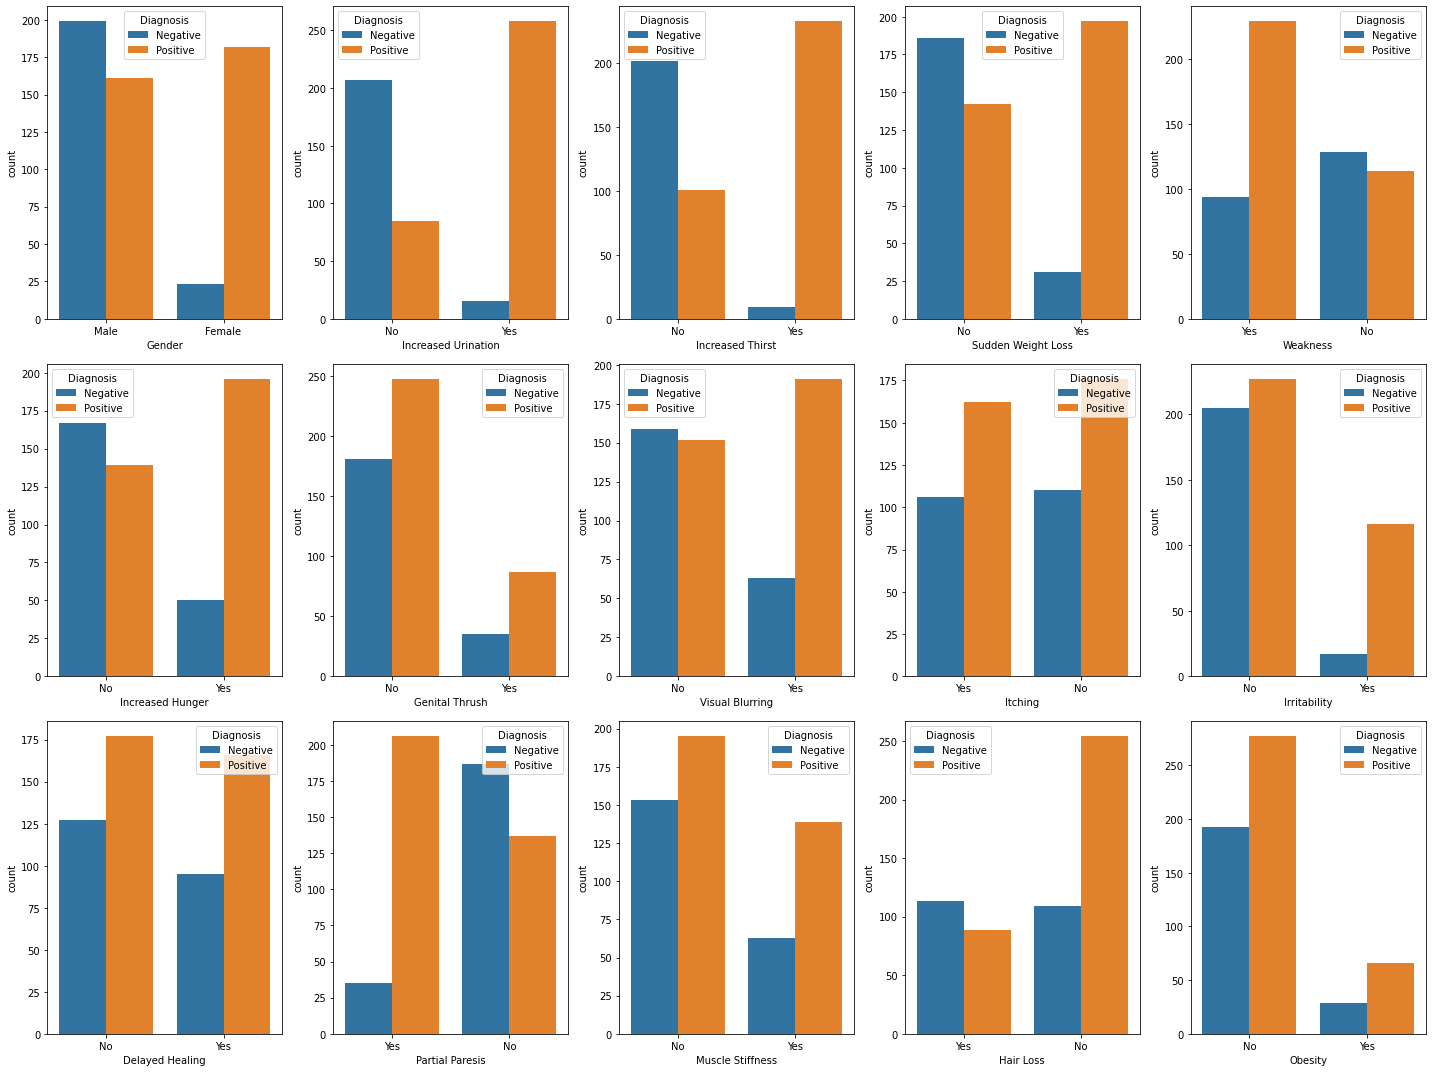

In [7]:
# b
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3,5, figsize=(20,15))
axs = axs.ravel()
for i, feat in enumerate(dataset.keys()):
    if feat== 'Age' or feat =='Diagnosis' or feat == 'Family History': 
        continue
    sns.countplot(x = dataset[feat], hue = dataset['Diagnosis'], ax = axs[i-1])
plt.tight_layout()
plt.show()

From the countplots above we can say that the most important features are Increased Urination and Increased Thirst, because in this features we can pretty good distinguish betwen Negative and Positive Diagnosis when we have or have not each of the features symptoms. 

Let us show to you distribution of the labels vs Age. We can see that there are more positive persons at the age > 75, and < 25.

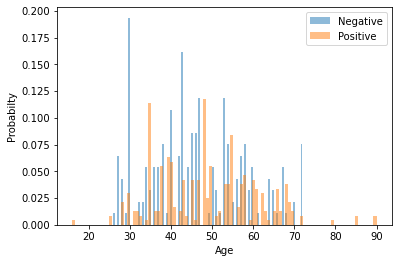

In [8]:
bins = 100
feat = 'Age'
idx_1 = (diag_state == 1).index[(diag_state == 1)['Diagnosis'] == True].tolist() # positive
idx_2 = (diag_state == 0).index[(diag_state == 0)['Diagnosis'] == True].tolist() # negative
plt.hist(dataset[feat].loc[idx_2], bins, density=True, alpha=0.5, label='Negative')
plt.hist(dataset[feat].loc[idx_1], bins, density=True, alpha=0.5, label='Positive')
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(loc='upper right')
plt.show()

### c

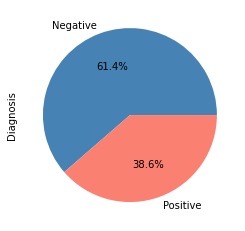

Negative samples account for 38.62% of the data.
Positive samples account for 61.38% of the data.


In [9]:

data['Diagnosis'].value_counts().plot(kind="pie", labels=['Negative','Positive'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%') 
plt.show()
print("Negative samples account for " + str("{0:.2f}".format(100 * len(idx_2) / len(diag_state))) + "% of the data.")
print("Positive samples account for " + str("{0:.2f}".format(100 * len(idx_1) / len(diag_state))) + "% of the data.")

For instance in this graph we can see good binary separation for Weakness:

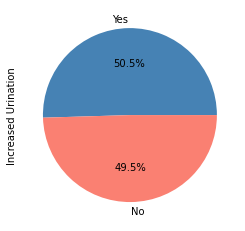

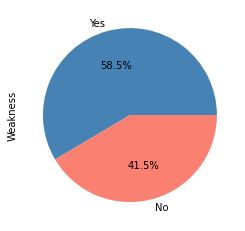

In [10]:
data['Increased Urination'].value_counts().plot(kind="pie", labels=['Yes','No'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%') 
plt.show()
data['Weakness'].value_counts().plot(kind="pie", labels=['Yes','No'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%') 
plt.show()

From the pictures above we can infer that our dataset (except Age) is binary ('YES','NO').

### d

We decided to look at the same Age correlation but for different Genders:

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

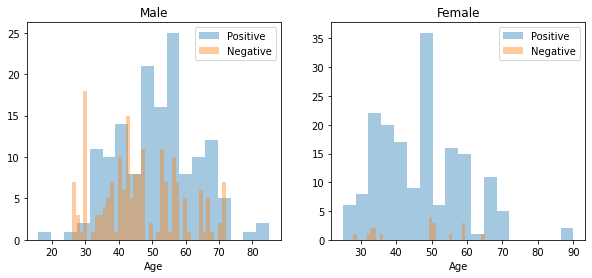

In [11]:
Positive = 'Positive'
Negative = 'Negative'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Gender']==1]
men = data[data['Gender']==0]
ax = sns.distplot(women[women['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Male')
ax = sns.distplot(men[men['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Female')

And we saw that so many female persons have a T1D, comparing with helthy ones. It shows us that dataset is not so balanced.


d. 
i. There are few negative samples of female in the data and number of positive samples of female in the dataset is bigger than number of positive samples of men, but we found in the internet that more men suffer from the Type 1 Diabetes. Moreover distribution of ages of the negative patienst is smaller than one of the positive patients. 

d.ii. There are features like Increased urination and Increased thirst that have separation (not 100%) between positive and negative diagnoses. For example if "Increased urination" = Yes the probability to get positive diagnosis much bigger than probability to get negative diagnosis and vice versa.   

## Question 4

Let us encode the data to onehot vector, using sklearn.
And doing the scaling for the Age only, using the equation: $\displaystyle \frac{Age - \mu}{\sigma}$

In [12]:
d = data
ohe = OneHotEncoder( sparse=False ) 
X_ohe = ohe.fit_transform(d.drop('Age', axis=1).drop('Diagnosis',axis = 1)) # drop Age and Diagnosis
'''
Here we wanted to do scaling for our data. But because the most of the data is binary, we do not need to scale it,
but the Age, are not binary, so let us scale it, using the formula described in Markdown above.
'''
dd = dataset.dropna()['Age'].values
dd = np.reshape(dd,(1, dd.size))
X_ohe = np.concatenate((dd.T,X_ohe), axis = 1)
Age =  X_ohe[:,0]
mu = np.mean(Age)
std = np.std(Age)
Age -=mu
Age/=std
age = np.array([Age])
X2 = np.concatenate((age.T, X_ohe[:,1:-1]),axis=1) # this is the new OneHot Vector, with scaled Age for all the features

Let us split the data again, using the scaled data and onehot vector

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X2, d['Diagnosis'], test_size=0.2, random_state=10, stratify =d['Diagnosis'] )

Here we wil use 5k cross fold validation to train the models, using Logistic Regression. We will look for the highest test AUC.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.962, test=0.926), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.950, test=0.925), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.948, test=0.985), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.954, test=0.931), total=   0.0s
[CV] clas

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


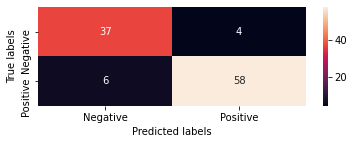

In [14]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = C

best_logreg = f.cv_kfold_logreg(X_train,y_train,C,5)

y_pred_logreg =  best_logreg.predict(X_test)
y_pred_proba_logreg = best_logreg.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

Report the evaluation metrics of the train and test sets:

In [15]:
print('For the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_logreg)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_logreg)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))

For the train set:

Accuracy is 0.93. 
F1 is 0.94. 
AUROC is 0.99. 

For the test set:

Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.95. 


Another linear classifier is SVM with linear kernel:

In [16]:
best_svm_lin = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=[0],flag = 'linear')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.954, test=0.983), total=   0.1s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.969, test=0.925), total=   0.1s
[CV] svm__C=0.001, svm__kernel=linear ................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.956, test=0.939), total=   0.1s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.954, test=0.987), total=   0.1s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.959, test=0.936), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.968, test=0.995), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.978, test=0.934), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.975, test=0.968), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.2s finished


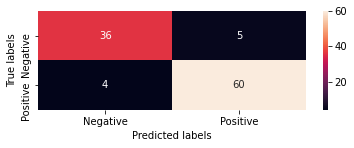

In [17]:
y_pred_svm_lin_best =  best_svm_lin.predict(X_test)
y_pred_proba_svm_lin_best = best_svm_lin.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_lin_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()


In [18]:
print('For the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_svm_lin)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_svm_lin)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))

For the train set:

Accuracy is 0.94. 
F1 is 0.95. 
AUROC is 0.98. 

For the test set:

Accuracy is 0.91. 
F1 is 0.93. 
AUROC is 0.97. 


Non-linear classifiers. First of all SVM with kernel rbf.

In [19]:
best_svm_rbf = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'rbf')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.958, test=0.986), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.970, test=0.927), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.961, test=0.942), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.959, test=0.984), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.962, test=0.939), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf ..................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf, roc_auc=(train=0.956, test=0.985), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf ..................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf, roc_auc=(train=0.969, test=0.929), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf ..................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf, roc_auc=(train=0.959, test=0.942), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf ..................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf, roc_auc=(train=0.954, test=0.987), total=   0.1s
[CV] svm__C=0.001, svm__g

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   24.1s finished


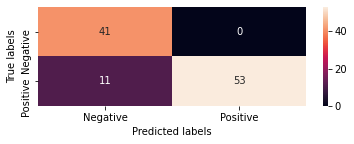

In [20]:
y_pred_svm_rbf_best =  best_svm_rbf.predict(X_test)
y_pred_proba_svm_rbf_best = best_svm_rbf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_rbf_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [21]:
print('For the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_svm_rbf)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_svm_rbf)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))

For the train set:

Accuracy is 1.00. 
F1 is 1.00. 
AUROC is 1.00. 

For the test set:

Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.98. 


Non-linear classifier - SVM with kernel poly.

In [22]:
best_svm_poly = f.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'poly')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.975, test=0.996), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.982, test=0.954), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.974, test=0.955), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.975, test=0.990), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.978, test=0.953), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=poly .................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=poly, roc_auc=(train=0.975, test=0.996), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=poly .................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=poly, roc_auc=(train=0.982, test=0.954), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=poly .................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=poly, roc_auc=(train=0.974, test=0.955), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=poly .................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=poly, roc_auc=(train=0.975, test=0.990), total=   0.1s
[CV] svm__C=0.001, 

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   14.6s finished


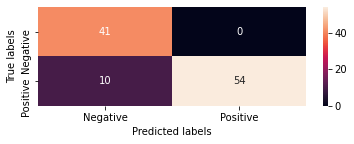

In [23]:
y_pred_svm_poly_best =  best_svm_poly.predict(X_test)
y_pred_proba_svm_poly_best = best_svm_poly.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_poly_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [24]:
print('For the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_svm_poly)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_svm_poly)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nAUROC is {:.2f}. '.format(Acc, F1,AUROC))

For the train set:

Accuracy is 1.00. 
F1 is 1.00. 
AUROC is 1.00. 

For the test set:

Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.99. 


## Question 6
Random Forest to chose the best 2 features:

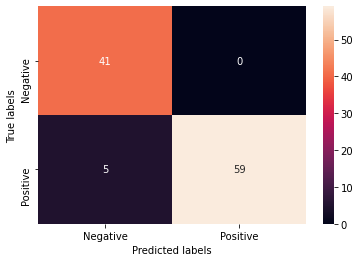

Accuracy is: 95.24%
F1 score is: 95.09%
AUC is:  98.49%


In [25]:
# Scaling of the Age because here we won't use onehot vector:
df = data.drop(['Diagnosis'],axis=1)
Age = df['Age']
mu = np.mean(Age)
std = np.std(Age)
Age -= mu
Age /= std
df = df.drop(['Age'], axis=1)
df.insert(0,'Age',Age, True)
#Taken from tutorial:
clf = rfc(n_estimators=10)
X_train, X_test, y_train, y_test = train_test_split(df, np.ravel(diag_state), test_size=0.2, random_state=10, stratify = np.ravel(diag_state) )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")
print('AUC is:  ' + str("{0:.02f}".format(100*roc_auc_score(y_test, y_pred_proba_test[:, 1]))) + '%')

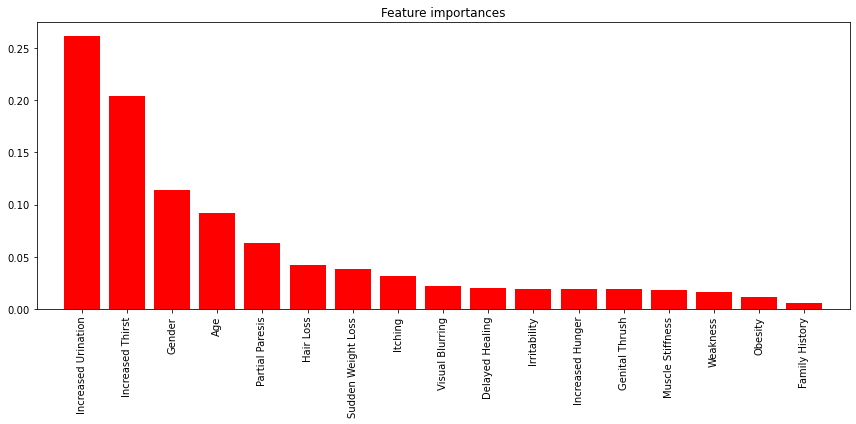

In [26]:
# Here we show the most important features (from the most important to less)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
o = np.zeros(len(orig_feat)).tolist()
for i,val in enumerate(indices):
    o[i] = orig_feat[val]
plt.xticks(range(X_train.shape[1]), o)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Question 7
### a
We took the whole dataset to implement a PCA.
We did scaling for whole data here.

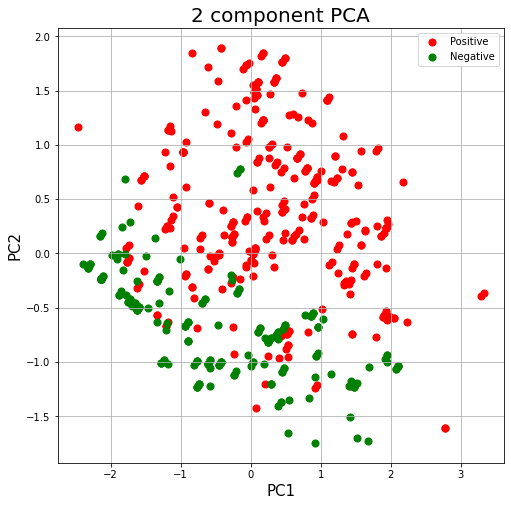

In [27]:
pca = PCA(n_components=2)
pca.fit(df)
transform_data = pca.transform(df)
PC = pca.fit_transform(df)
pdf = pd.DataFrame(data = PC
             , columns = ['PC1', 'PC2'])
df_ = pd.concat([pdf, data[['Diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_['Diagnosis'] == target
    ax.scatter(df_.loc[indicesToKeep, 'PC1']
               , df_.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(['Positive','Negative'])
ax.grid()


### b
PCA does not work good with binary data, so the results can be not realistic. But we did scaling to the Age in the previous question.
From graph (part a) that we get, we can see that our reduced to 2 RCA components data is relativly linearly separable.

### c

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X2, d['Diagnosis'], test_size=0.2, random_state=10, stratify =d['Diagnosis'] )
skf = SKFold(n_splits=5)
pca = PCA(n_components=2)
logreg = LogisticRegression()
pipe_pca_logreg = Pipeline(steps=[('pca', pca), ('classifier', logreg)])
Svm = GridSearchCV(estimator=pipe_pca_logreg,
                           param_grid={'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1', 'l2'],
              'classifier__C': C,
              'classifier__solver': ['liblinear']},
                           scoring=['roc_auc'],
                           cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
Svm.fit(X_train, y_train)
best_logreg1 = Svm.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.948, test=0.921), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.936, test=0.904), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.935, test=0.968), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.935, test=0.928), total=   0.0s
[CV] clas

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


In [29]:


svm_lin = svm.SVC(probability=True,gamma='auto',kernel = 'linear')
pca = PCA(n_components=2)
pipe_pca_svm_lin = Pipeline(steps=[('pca', pca), ('svm', svm_lin)])
Svm1 = GridSearchCV(estimator=pipe_pca_svm_lin,
                           param_grid={'svm__kernel': ['linear'], 'svm__C': C},
                           scoring=['roc_auc'],
                           cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
Svm1.fit(X_train, y_train)
best_svm_lin1 = Svm1.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.930, test=0.963), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.948, test=0.921), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.935, test=0.904), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.937, test=0.969), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.935, test=0.928), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.936, test=0.969), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.953, test=0.928), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.944, test=0.921), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.2s finished


In [30]:
pca = PCA(n_components=2)
svm_rbf = svm.SVC(probability=True,gamma='auto',kernel = 'linear')
pca = PCA(n_components=2)
pipe_pca_svm_rbf = Pipeline(steps=[('pca', pca), ('svm', svm_rbf)])
Svm11 = GridSearchCV(estimator=pipe_pca_svm_rbf,
                           param_grid={'svm__kernel': ['rbf'], 'svm__C': C},
                           scoring=['roc_auc'],
                           cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
Svm11.fit(X_train, y_train)
best_svm_rbf1 = Svm11.best_estimator_



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.947, test=0.979), total=   0.1s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.965, test=0.923), total=   0.1s
[CV] svm__C=0.001, svm__kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.948, test=0.938), total=   0.1s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.952, test=0.977), total=   0.1s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.954, test=0.931), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.948, test=0.979), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.965, test=0.924), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.948, test=0.938), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.952, tes

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.0s finished


In [31]:
pca = PCA(n_components=2)
svm_poly = svm.SVC(probability=True,gamma='auto',kernel = 'poly')
pca = PCA(n_components=2)
pipe_pca_svm_poly = Pipeline(steps=[('pca', pca), ('svm', svm_poly)])
Svm2 = GridSearchCV(estimator=pipe_pca_svm_poly,
                           param_grid={'svm__kernel': ['poly'], 'svm__C': C},
                           scoring=['roc_auc'],
                           cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
Svm2.fit(X_train, y_train)
best_svm_poly1 = Svm2.best_estimator_



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=poly ..................................
[CV]  svm__C=0.001, svm__kernel=poly, roc_auc=(train=0.940, test=0.971), total=   0.0s
[CV] svm__C=0.001, svm__kernel=poly ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__kernel=poly, roc_auc=(train=0.958, test=0.941), total=   0.1s
[CV] svm__C=0.001, svm__kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__kernel=poly, roc_auc=(train=0.937, test=0.904), total=   0.1s
[CV] svm__C=0.001, svm__kernel=poly ..................................
[CV]  svm__C=0.001, svm__kernel=poly, roc_auc=(train=0.943, test=0.982), total=   0.0s
[CV] svm__C=0.001, svm__kernel=poly ..................................
[CV]  svm__C=0.001, svm__kernel=poly, roc_auc=(train=0.951, test=0.934), total=   0.1s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, roc_auc=(train=0.952, test=0.982), total=   0.1s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, roc_auc=(train=0.967, test=0.935), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, roc_auc=(train=0.959, test=0.951), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, roc_auc=(train=0.9

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.1s finished


### d

In [44]:
X3 = dataset.dropna()[['Increased Urination', 'Increased Thirst']]
X3n = pd.get_dummies(X3)
X_train_3n, X_test_3n, y_train_3n, y_test_3n = train_test_split(X3n.values, d['Diagnosis'], test_size=0.2, random_state=11,stratify = d['Diagnosis'])
best_logreg_2feat = f.cv_kfold_logreg(X_train_3n,y_train_3n,C,K=5)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear, roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l1, classifier__solver=liblinear

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.913, test=0.947), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.919, test=0.909), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.917, test=0.925), total=   0.0s
[CV] classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear 
[CV]  classifier=LogisticRegression(), classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear, roc_auc=(train=0.934, test=0.840), total=   0.0s
[CV] cla

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


In [45]:

best_svm_lin = f.cv_kfold_svm(X_train_3n,y_train_3n,C=C,K=5,gamma=[0],flag = 'linear')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.905, test=0.962), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.913, test=0.947), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.919, test=0.909), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.917, test=0.925), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.934, test=0.840), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.905, test=0.962), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.913, test=0.947), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, ro

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.1s finished


In [46]:

best_svm_rbf = f.cv_kfold_svm(X_train_3n,y_train_3n,C=C,K=5,gamma=gamma,flag = 'rbf')

Fitting 5 folds for each of 36 candidates, totalling 180 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.905, test=0.962), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.913, test=0.947), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.919, test=0.909), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.917, test=0.925), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf .................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf, roc_auc=(train=0.934, test=0.840), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf ..................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf, roc_auc=(train=0.905, test=0.962), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf ..................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf, roc_auc=(train=0.913, test=0.947), total=   0.1s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf ..................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf, roc_auc=(train=0.919, test=0.909), total=   0.1s
[CV] svm__C=0.001, svm__

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    9.6s finished


In [47]:

best_svm_poly = f.cv_kfold_svm(X_train_3n,y_train_3n,C=C,K=5,gamma=gamma,flag = 'poly')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.905, test=0.962), total=   0.0s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.913, test=0.947), total=   0.0s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.919, test=0.909), total=   0.0s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.917, test=0.925), total=   0.0s
[CV] svm__C=0.001, svm__gamma=0.001, svm__kernel=poly ................
[CV]  svm__C=0.001, svm__gamma=0.001, svm__kernel=poly, roc_auc=(train=0.934, test=0.840), total=   0.0s
[CV] svm__C=0.001, svm__gamma=0.01, svm__kernel=poly .................
[CV]  svm__C=0.001, svm__gamma=0.01, svm__kernel=poly, roc_auc=(train=0.905, test=0.962), total=   0.0s
[CV] svm__C=0.00

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    8.2s finished


In [48]:
print('For 2 best features, which we have chosen from RF:\n')
print('\nFor Logistic Regression:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train_3n,y_train_3n,best_logreg_2feat)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test_3n,y_test_3n,best_logreg_2feat)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))

print('\nFor SVM kernel linear:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train_3n,y_train_3n,best_svm_lin)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test_3n,y_test_3n,best_svm_lin)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))

print('\nFor SVM kernel rbf:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train_3n,y_train_3n,best_svm_rbf)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test_3n,y_test_3n,best_svm_rbf)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))

print('\nFor SVM kernel poly:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train_3n,y_train_3n,best_svm_poly)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test_3n,y_test_3n,best_svm_poly)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))


print('\n\n\n\nFor PCA preprocessing for 4 different classifiers:\n')
print('\nFor Logistic Regression:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_logreg1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_logreg1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))

print('\nFor SVM kernel linear:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_svm_lin1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_svm_lin1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))

print('\nFor SVM kernel rbf:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_svm_rbf1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_svm_rbf1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))

print('\nFor SVM kernel poly:\n')
print('\nFor the train set:\n')
Acc,F1,AUROC = f.calc_stat(X_train,y_train,best_svm_poly1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))
print('\nFor the test set:\n')
Acc,F1,AUROC = f.calc_stat(X_test,y_test,best_svm_poly1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}.\nAUROC is {:.2f} '.format(Acc, F1, AUROC))

For 2 best features, which we have chosen from RF:


For Logistic Regression:


For the train set:

Accuracy is 0.88. 
F1 is 0.90.
AUROC is 0.92 

For the test set:

Accuracy is 0.83. 
F1 is 0.84.
AUROC is 0.87 

For SVM kernel linear:


For the train set:

Accuracy is 0.61. 
F1 is 0.76.
AUROC is 0.92 

For the test set:

Accuracy is 0.61. 
F1 is 0.76.
AUROC is 0.87 

For SVM kernel rbf:


For the train set:

Accuracy is 0.88. 
F1 is 0.90.
AUROC is 0.92 

For the test set:

Accuracy is 0.83. 
F1 is 0.84.
AUROC is 0.87 

For SVM kernel poly:


For the train set:

Accuracy is 0.88. 
F1 is 0.90.
AUROC is 0.92 

For the test set:

Accuracy is 0.83. 
F1 is 0.84.
AUROC is 0.87 




For PCA preprocessing for 4 different classifiers:


For Logistic Regression:


For the train set:

Accuracy is 0.91. 
F1 is 0.92.
AUROC is 0.95 

For the test set:

Accuracy is 0.86. 
F1 is 0.87.
AUROC is 0.92 

For SVM kernel linear:


For the train set:

Accuracy is 0.91. 
F1 is 0.92.
AUROC is 0.95 

For the te

The code for the partc C and D was taken from the previous part of the hw. (At C we have PCA in addition).
### e
The PCA is better than 2 features. PCA finds the components which maximize variance, so it does not mean that it takes the 2 best features, it takes a vector which contains "elements" from every feature. So it can give a better results than taking only 2 features. 


# Theory Questions 

Q1: We think that performance is more important for us, because if we have unbalanced data we can get high accuracy but the other performances will be bad. For example if we have 3% pathology data samples and the classifier always returns healthy label we will get high accuracy (97%) but sensitivity, for example, will be low. 

Q2: If we chose just 2 features we have 2 options:
1) we choose the most correlated features and other not usefull for our classification we will get good performance for predicted labels, and it will be easy for computation

2) if we chose features with bad correlation (it means not usefull for classification) we will get a bad prediction results. But computation will be fast.

If we chose all the features, we have extra information that can be not useful for us and make computetions slower, require a large amount of system memory and will affect the performance. In other hand many features can lead to better performance, because we have more information that is usefull. 

Q3: We have very similar data, so it will be hard to find margin that maximize the distance between support vectors. Hence linear svm will be less usefull here. Logistic regression is based on probabilities so we think that it will work better. In the question we have no information about number of examples and features, and the numbers will influence the model we will prefer. If we have small number of features and medium number of examples we will prefer to use non-linear SVM, in other cases we will prefer logistic regression. (We used information from https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16)

Q4:
SVM works well with unstructured and semi-structured data such as images and text, while logistic regression works well with already identified explanatory variables. The risk of overfitting is less in linear, whereas logistic regression can lead to overfitting easier. SVM is based on geometric properties of data, it tries to find the best margin that will maximize distance between support vectors. The main hyperparameter of linear SVM is C. The parameter regulates number of misclasified data points, because real data almost always is not ideally linear separable. If C is big number of misclassifications is low and margin is smaller than in the case when C is small. Logistic regression is based on statistical approaches. Its main hyperparameters are C, penalty and solver.
Optimization problem to solve in Logistic regression is:

$\displaystyle \sum_{i=1}^{m} \log P\{y^{(i)} | x^{(i)} , \theta\} - \lambda||\theta||_1 \rightarrow max $ - this is penalty L1, 

$\displaystyle \sum_{i=1}^{m} \log P\{y^{(i)} | x^{(i)} , \theta\} - \lambda||\theta||^2 \rightarrow max $ - this is penalty L2,

where $\displaystyle \lambda = C$- regularization parameter. When C is low -> regularization is high, else if C is high -> regularization is low.
Regularization says to us how much is our feature important. For instance, for L2 and C low, weight of some of the features will be zero.
(https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167, https://en.wikipedia.org/wiki/Logistic_regression, https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16)